In [15]:
import time
from astropy.io import fits
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [11]:
# Open the FITS file
hdul = fits.open('COSMOS2015_Laigle+_v1.1.fits')

all_data = pd.DataFrame(hdul[1].data)

# Select the desired columns
data = hdul[1].data[:5000]  # Assuming the desired data is in the second extension
column_names = ['ALPHA_J2000', 'DELTA_J2000', 'ZPDF', 'B_FLUX_APER2', 'V_FLUX_APER2', 'r_FLUX_APER2', 'MB', 'MV', 'MR', 'MI', 'MZ']  # Replace with the actual column names

# Create a dictionary to store the column data
column_data = {}
for column_name in column_names:
    column_data[column_name] = data[column_name]

# Create a DataFrame
df = pd.DataFrame(column_data)

# Close the FITS file
hdul.close()

In [12]:
all_data

,ALPHA_J2000,DELTA_J2000,NUMBER,X_IMAGE,Y_IMAGE,ERRX2_IMAGE,ERRY2_IMAGE,ERRXY_IMAGE,FLAG_HJMCC,FLUX_RADIUS,...,SFR_MED_MIN68,SFR_MED_MAX68,SFR_BEST,SSFR_MED,SSFR_MED_MIN68,SSFR_MED_MAX68,SSFR_BEST,L_NU,L_R,L_K
0,149.683188,1.435402,1,33108.570312,3467.180420,0.083433,0.004788,0.005408,1,0.0,...,0.228640,1.727830,1.595900,-8.53751,-9.04001,-8.01545,-7.34081,29.476819,29.231916,28.926819
1,149.686638,1.435453,2,33025.773438,3468.382080,0.005614,0.003615,-0.000756,1,0.0,...,-0.011127,2.040520,-1.177070,-8.50509,-8.96368,-8.00457,-11.72340,28.270999,29.716626,29.819099
2,149.671098,1.435451,3,33398.683594,3468.409424,0.005500,0.006162,0.000551,1,0.0,...,1.014510,2.450450,-1.608270,-8.46294,-8.86681,-7.99230,-12.73180,28.558149,30.250126,30.420649
3,149.697511,1.435489,4,32764.867188,3469.203613,0.002631,0.003024,0.000483,1,0.0,...,-0.109185,0.457006,0.431677,-8.48441,-8.91516,-8.00115,-7.90475,28.481169,28.387766,28.150769
4,149.680533,1.435487,5,33172.269531,3469.238770,0.006500,0.002993,0.001589,1,0.0,...,0.226843,0.787161,-5.486240,-8.52487,-8.94620,-8.03227,-14.75510,26.340069,28.230176,28.444279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182103,151.016122,3.039070,1182104,1146.575562,41965.746094,0.040255,0.020997,0.000780,1,0.0,...,-99.000000,-99.000000,-99.000000,-99.00000,-99.00000,-99.00000,0.00000,-999.900000,-999.900000,-999.900000
1182104,151.026803,3.044393,1182105,890.575562,42093.746094,0.040255,0.020997,0.000780,1,0.0,...,-99.000000,-99.000000,-99.000000,-99.00000,-99.00000,-99.00000,0.00000,-999.900000,-999.900000,-999.900000
1182105,150.755096,3.044820,1182106,7404.250488,42099.316406,0.018633,0.064743,-0.000016,1,0.0,...,-99.000000,-99.000000,-99.000000,-99.00000,-99.00000,-99.00000,0.00000,-999.900000,-999.900000,-999.900000
1182106,151.037485,3.049715,1182107,634.573059,42221.734375,0.040278,0.020989,0.000775,1,0.0,...,-99.000000,-99.000000,-99.000000,-99.00000,-99.00000,-99.00000,0.00000,-999.900000,-999.900000,-999.900000


In [14]:
all_data[['ALPHA_J2000', 'DELTA_J2000']]

,ALPHA_J2000,DELTA_J2000
0,149.683188,1.435402
1,149.686638,1.435453
2,149.671098,1.435451
3,149.697511,1.435489
4,149.680533,1.435487
...,...,...
1182103,151.016122,3.039070
1182104,151.026803,3.044393
1182105,150.755096,3.044820
1182106,151.037485,3.049715


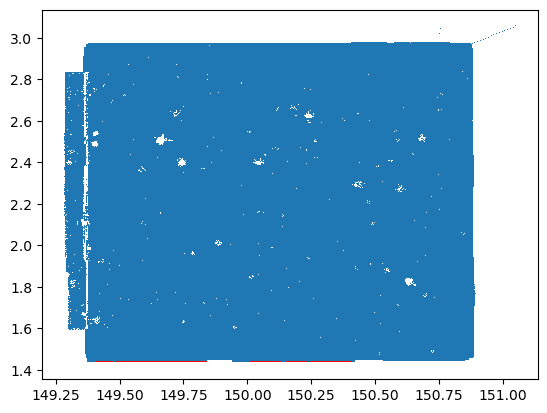

In [21]:
plt.plot(all_data['ALPHA_J2000'], all_data['DELTA_J2000'], ',')
plt.plot(all_data['ALPHA_J2000'][:5000], all_data['DELTA_J2000'][:5000], ',', color='r')